## <center>Exercises 2: Monte Carlo integration and Random Walks</center>

In this notebook we will try to solve integrals via Monte Carlo integration tecniques and exploit the uniform probability sampling to perform random walks.

In [ ]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1

In this exercise we are going to compute the integral
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
via Monte Carlo integration tecniques.
<br> Namely, we are going to approximate the integral as the mean of certain $N$ values $y_i$ distributed along a particular probability function $d(x)$:
$$I \approx \frac{1}{N}\sum_{i=1}^N y_i$$
with $y_i$ following the probability $d(x)$.
<br> We will do this by sampling a uniform distribution and by using importance sampling in the interval $[0,1]$.
<br> We will compute $M=10^5$ values of the integral and divide the data into $N=100$ blocks of $L=1000$ steps each for the data blocking.

#### 1. Uniform distribution (mean method)

With the mean method we evaluate the integral $I$ as the mean of the function 
$$f(x) = \frac{\pi}{2}\cos(\pi x/2)$$
according to a uniform distribution $p(x) = 1$.
<br> This means that we are going to compute the value of $I$ as follows:
$$I = \frac{1}{N}\sum_{i=1}^N f(x_i)$$
with $x_i$ uniform random numbers in $[0,1]$.
<br> The figure below shows the difference between the estimation of the integral resulting from the simulation and its exact value.

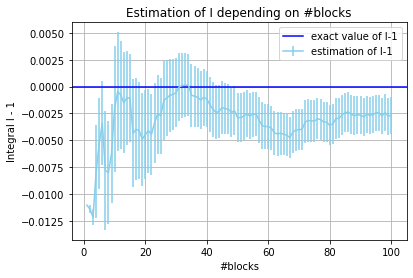

In [6]:
nblocks, integral_1, error_1 = np.loadtxt("./ex_1/Output/mean_method.out", usecols=(0,1,2), delimiter=None, unpack='true')

plt.errorbar(nblocks,integral_1-1.,yerr=error_1,color='skyblue',label='estimation of I-1')
plt.axhline(y=0,color='blue',label='exact value of I-1')
plt.xlabel('#blocks')
plt.ylabel('Integral I - 1')
plt.title('Estimation of I depending on #blocks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### 2. Importance sampling

Importance sampling consists in evaluating the integral still as an average of various values of an integrand function, but assuming a probability density function similar to the integrand as much as possible. 
<br> Here the integrand function is
$$f(x) = \frac{\pi}{2}\cos(\pi x/2)$$
We want our probability density function $p(x)$ to be similar in shape to $f(x)$. Moreover, being a probability density function, $p(x)$ has to be positive and normalized to 1 in the concerned interval $[0,1]$.
<br> We will now try two different probability density functions, a linear and a quadratic approximation of the integrand function: we expect the results of the latter to be better, since it is a more precise approximation of the integrand.

##### - Linear approximation:

Given the shape of the integrand function $f(x)$ we can use as our $p(x)$ a linear approximation of the integrand in the interval $[0,1]$, as shown in the next picture. 
<br> This approximation can be obtained computing the analytical expression of the line intersecating $f(x)$ in $x=0$ and $x=1$, which is $p(x) = \frac{\pi}{2}(1-x)$. Normalizing the function in $[0,1]$ we obtain our probability density function
$$p(x) = 2(1-x)$$

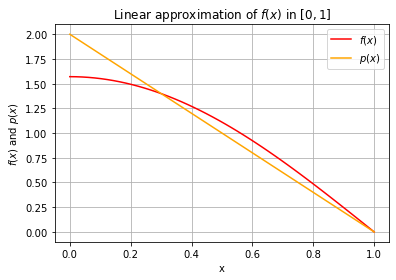

In [16]:
def f(x):   #defining integrand function
    return np.pi/2. * np.cos(pi/2. * x)

def p(x):   #defining the new pdf
    return 2.*(1-x)

x = np.linspace(0.,1.)
plt.plot(x,f(x),color='red',label='$f(x)$')
plt.plot(x,p(x),color='orange',label='$p(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$ and $p(x)$')
plt.title('Linear approximation of $f(x)$ in $[0,1]$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

With this method our integrand function is seen as $f(x) = g(x) p(x)$, where $p(x)$ is the probability density function. The integral $I$ is the average of $g(x)$ according to the probability density function $p(x)$, therefore we are going to evaluate it computing
$$I = \frac{1}{N}\sum_{i=1}^N g(x_i)$$
with $x_i$ random numbers distributed with $p(x)$ in $[0,1]$ and $g(x) = \frac{f(x)}{p(x)} = \frac{\pi}{4}\frac{\cos(\frac{\pi}{2}x)}{1-x}$.
<br /> To sample the distribution $p(x)$ we can invert its cumulative function: we obtain that the numbers $x_i = 1 - \sqrt{1-y_i}$, with $y_i$ uniform random numbers in $[0,1]$, are distributed according to $p(x)$.
<br> The figure below shows the difference between the estimation of the integral resulting from the simulation and its exact value.

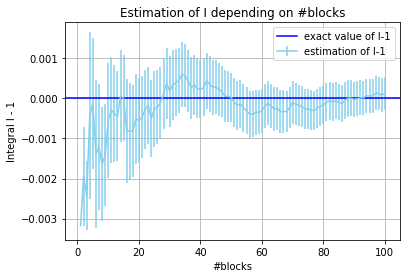

In [7]:
nblocks, integral_2, error_2 = np.loadtxt("./ex_1/Output/importance_sampling1.out", usecols=(0,1,2), delimiter=None, unpack='true')

plt.errorbar(nblocks,integral_2-1.,yerr=error_2,color='skyblue',label='estimation of I-1')
plt.axhline(y=0,color='blue',label='exact value of I-1')
plt.xlabel('#blocks')
plt.ylabel('Integral I - 1')
plt.title('Estimation of I depending on #blocks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

##### - Quadratic approximation:

We can now try to be more precise choosing a more accurate approximation of $f(x)$ as $p(x)$, a parabolic function. This choice can be made in the same way as before: the parabolic function intersecating $f(x)$ in $x=0$ and $x=1$ is $p(x) = \frac{\pi}{2}(1-x^2)$; the normalized probability density function is
$$p(x) = \frac{3}{2}(1-x^2)$$
which is represented in the graph below.

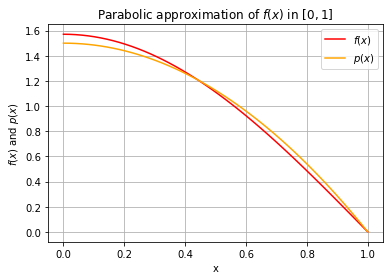

In [17]:
def p(x):   #defining the new pdf
    return 3./2.*(1-x**2)

x = np.linspace(0.,1.)
plt.plot(x,f(x),color='red',label='$f(x)$')
plt.plot(x,p(x),color='orange',label='$p(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$ and $p(x)$')
plt.title('Parabolic approximation of $f(x)$ in $[0,1]$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

We proceed as before with $g(x) = \frac{f(x)}{p(x)} = \frac{\pi}{3} \frac{\cos(\frac{\pi}{2}x)}{1-x^2}$.
<br /> Here we can't invert the cumulative function analytically; to sample $x_i$ distributed according to $p(x)$ we can use rejection tecniques.
<br> The figure below shows the difference between the estimation of the integral resulting from the simulation and its exact value.

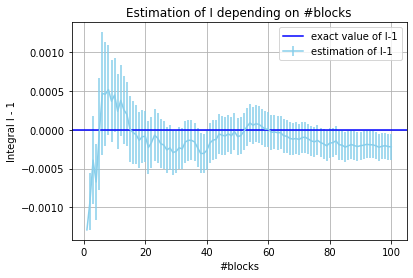

In [8]:
nblocks, integral_3, error_3 = np.loadtxt("ex_1/Output/importance_sampling2.out", usecols=(0,1,2), delimiter=None, unpack='true')

plt.errorbar(nblocks,integral_3-1.,yerr=error_3,color='skyblue',label='estimation of I-1')
plt.axhline(y=0,color='blue',label='exact value of I-1')
plt.xlabel('#blocks')
plt.ylabel('Integral I - 1')
plt.title('Estimation of I depending on #blocks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### General conclusions:

The estimations obtained with importance sampling are more precise than the one obtained with uniform sampling; this confirms that importance sampling can be used to reduce fluctuations. 
<br> We would expect the second try with importance sampling to be more accurate than the first one (as the approximation of $f(x)$ is), and this is what we actually get from the simulations. 
<br> A comparison between the three cases is shown in the figure below: we can notice that the uncertainties are lower with importance sampling methods, especially with the second probability density.

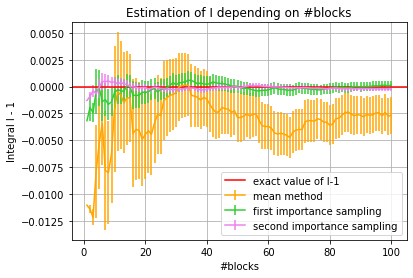

In [5]:
plt.errorbar(nblocks,integral_1-1.,yerr=error_1,color='orange',label='mean method')

plt.errorbar(nblocks,integral_2-1.,yerr=error_2,color='limegreen',label='first importance sampling')

plt.errorbar(nblocks,integral_3-1.,yerr=error_3,color='violet',label='second importance sampling')

plt.axhline(y=0,color='red',label='exact value of I-1')

plt.xlabel('#blocks')
plt.ylabel('Integral I - 1')
plt.title('Estimation of I depending on #blocks')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Exercise 2

In this exercise we will perform a 3D random walk on a cubic lattice and in the continuum. 

<br> For the cubic lattice simulation we will assume to be able to move only in the direction $x$, $y$ or $z$; each move has a constant length $a=1$, that can be positive or negative (we can move forwards or backwards). The direction and the sign of the translation are chosen with a uniform probability.
<br> In the case of the continuum random walk, instead, we will extract the two angles that define the direction in the 3D space, namely $\theta$ and $\phi$ chosen with uniform probability respectively in the range $[0,\pi]$ and $[0,2\pi]$. Each move is again defined by a constant length $a=1$ that here represents the radius of the spatial translation.

<br> We will perform both these random walks $N=100$ times, each time for $100$ steps, always starting from the origin. If we compute the distance from the origin at each step, we will then have $N$ blocks of data, namely $N$ values of the distance for each step $i$; we will use these values to compute the average distance from the origin and its uncertainty at fixed step $i$.
<br> We will then plot the average distance $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as a function of the steps $i$ and see if they resemble a diffusive behaviour.

#### 1) RW in the continuum:

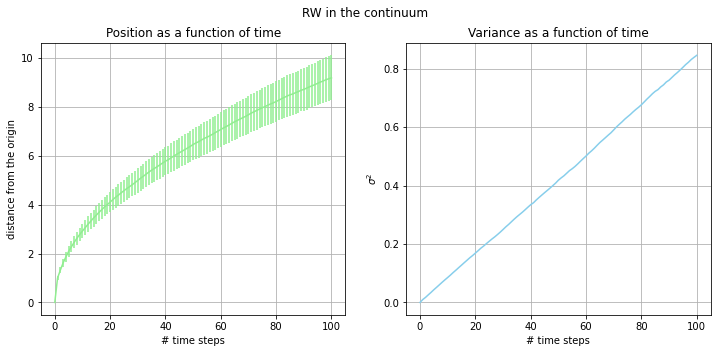

In [9]:
time, r, error = np.loadtxt("./ex_2/Output/RW_continuum.out", usecols=(0,1,2), delimiter=None, unpack='true')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('RW in the continuum')

ax1.errorbar(time,r,yerr=error,color='lightgreen')
ax1.set_xlabel('# time steps')
ax1.set_ylabel('distance from the origin')
ax1.set_title('Position as a function of time')
ax1.grid(True)

ax2.plot(time,error**2,color='skyblue')
ax2.set_xlabel('# time steps')
ax2.set_ylabel('$\sigma ^2$')
ax2.set_title('Variance as a function of time')
ax2.grid(True)

plt.show()

These results show a diffusive behaviour: this type of behaviour is, in fact, characterized by the position following the trend of $f(N)=k\sqrt{N}$ and the variance with a linear dependence on $N$, $N$ being the number of steps in time.
<br> As we can see in the fits below, the results agree with these theorical behaviour, with paramenter $k\approx{1}$. 

optimized parameter k =
[0.91802271]


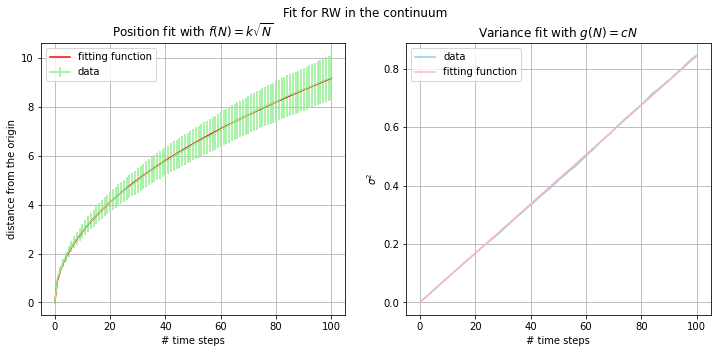

In [10]:
from scipy.optimize import curve_fit

def f(n,k):                            # defining the fitting function
    return k * np.sqrt(n)

def g(n,c):
    return c * n

time, r, error = np.loadtxt("./ex_2/Output/RW_continuum.out", usecols=(0,1,2), delimiter=None, unpack='true')

p_opt_f, p_cov_f = curve_fit(f, time, r)
r_fit = f(time,p_opt_f)
print("optimized parameter k =")
print(p_opt_f)

p_opt_g, p_cov_g = curve_fit(g, time, error**2)
error_fit = g(time,p_opt_g)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Fit for RW in the continuum')

ax1.errorbar(time,r,yerr=error,color='lightgreen',label='data')
ax1.plot(time,r_fit,color='red',label='fitting function')
ax1.set_xlabel('# time steps')
ax1.set_ylabel('distance from the origin')
ax1.set_title('Position fit with $f(N)=k\sqrt{N}$')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.plot(time,error**2,color='skyblue',label='data')
ax2.plot(time,error_fit,color='lightpink',label='fitting function')
ax2.set_xlabel('# time steps')
ax2.set_ylabel('$\sigma ^2$')
ax2.set_title('Variance fit with $g(N)=cN$')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.show()

#### 2) RW in a cubic lattice:

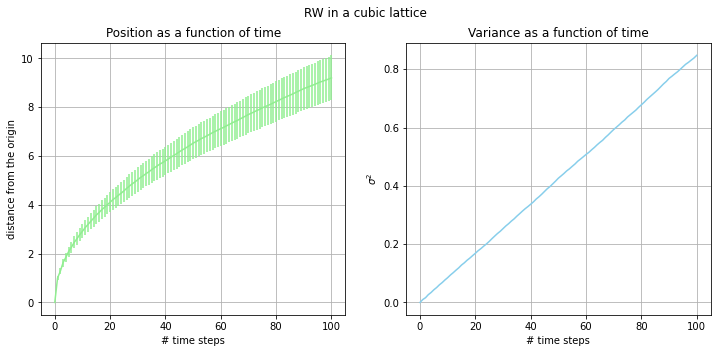

In [11]:
time, r, error = np.loadtxt("./ex_2/Output/RW_cubiclattice.out", usecols=(0,1,2), delimiter=None, unpack='true')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('RW in a cubic lattice')

ax1.errorbar(time,r,yerr=error,color='lightgreen')
ax1.set_xlabel('# time steps')
ax1.set_ylabel('distance from the origin')
ax1.set_title('Position as a function of time')
ax1.grid(True)

ax2.plot(time,error**2,color='skyblue')
ax2.set_xlabel('# time steps')
ax2.set_ylabel('$\sigma ^2$')
ax2.set_title('Variance as a function of time')
ax2.grid(True)

plt.show()

The conclusions drawn for the random walk in the continuum can also be applied in this case, since the behaviour of the distance from the origin and its variance is the same. 
<br> We can again fit these trend with the diffusive behaviour: as shown below, we obtain very similar results, with the optimized parameter $k\approx1$.

optimized parameter k =
[0.92061692]


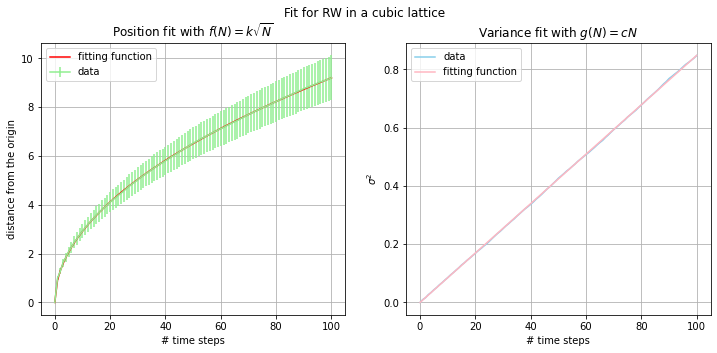

In [12]:
from scipy.optimize import curve_fit

def f(n,k):                            # defining the fitting function
    return k * np.sqrt(n)

def g(n,c):
    return c * n

time, r, error = np.loadtxt("./ex_2/Output/RW_cubiclattice.out", usecols=(0,1,2), delimiter=None, unpack='true')

p_opt_f, p_cov_f = curve_fit(f, time, r)
r_fit = f(time,p_opt_f)
print("optimized parameter k =")
print(p_opt_f)

p_opt_g, p_cov_g = curve_fit(g, time, error**2)
error_fit = g(time,p_opt_g)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Fit for RW in a cubic lattice')

ax1.errorbar(time,r,yerr=error,color='lightgreen',label='data')
ax1.plot(time,r_fit,color='red',label='fitting function')
ax1.set_xlabel('# time steps')
ax1.set_ylabel('distance from the origin')
ax1.set_title('Position fit with $f(N)=k\sqrt{N}$')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.plot(time,error**2,color='skyblue',label='data')
ax2.plot(time,error_fit,color='lightpink',label='fitting function')
ax2.set_xlabel('# time steps')
ax2.set_ylabel('$\sigma ^2$')
ax2.set_title('Variance fit with $g(N)=cN$')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.show()